1. over sample quality categories 3, 4, 8, and 9 to about 3000
2. under sample quality categories 5, 6, and 7

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns

In [131]:
#Import csv file into Pandas data frame

df = pd.read_csv('winequality-white.csv',sep=";")


In [132]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [201]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [133]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Wine Quality


Text(0.5, 1.0, 'Count of Wine Quality Ratings')

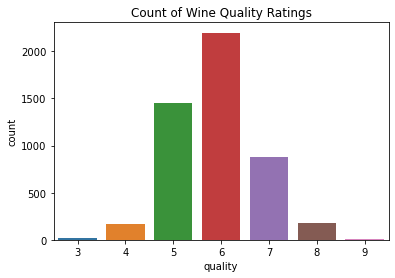

In [135]:
#Histogram of Wine Quality with Seaborn
print('Wine Quality')
sns.countplot(x='quality', data=df).set_title('Count of Wine Quality Ratings')

In [136]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [144]:
n_q3 = (df.quality == 3).sum()
n_q4 = (df.quality == 4).sum()
n_q5 = (df.quality == 5).sum()
n_q6 = (df.quality == 6).sum()
n_q7 = (df.quality == 7).sum()
n_q8 = (df.quality == 8).sum()
n_q9 = (df.quality == 9).sum()

In [145]:
print("Quality 3: " + str(n_q3))
print("Quality 4: " + str(n_q4))
print("Quality 5: " + str(n_q5))
print("Quality 6: " + str(n_q6))
print("Quality 7: " + str(n_q7))
print("Quality 8: " + str(n_q8))
print("Quality 9: " + str(n_q9))

Quality 3: 20
Quality 4: 163
Quality 5: 1457
Quality 6: 2198
Quality 7: 880
Quality 8: 175
Quality 9: 5


In [155]:
target_n = 500
Q3_change_n = target_n - n_q3
Q4_change_n = target_n - n_q4
Q5_change_n = target_n - n_q5
Q6_change_n = target_n - n_q6
Q7_change_n = target_n - n_q7
Q8_change_n = target_n - n_q8
Q9_change_n = target_n - n_q9

In [156]:
print("Quality 3 n change: " + str(Q3_change_n))
print("Quality 4 n change: " + str(Q4_change_n))
print("Quality 5 n change: " + str(Q5_change_n))
print("Quality 6 n change: " + str(Q6_change_n))
print("Quality 7 n change: " + str(Q7_change_n))
print("Quality 8 n change: " + str(Q8_change_n))
print("Quality 9 n change: " + str(Q9_change_n))



Quality 3 n change: 480
Quality 4 n change: 337
Quality 5 n change: -957
Quality 6 n change: -1698
Quality 7 n change: -380
Quality 8 n change: 325
Quality 9 n change: 495


## Down-sample Quality Categories 5, 6, and 7

In [160]:
target_n = 500
df_q5 = df.loc[df['quality'] == 5].sample(n=target_n)
df_q5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 2895 to 338
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         500 non-null    float64
 1   volatile acidity      500 non-null    float64
 2   citric acid           500 non-null    float64
 3   residual sugar        500 non-null    float64
 4   chlorides             500 non-null    float64
 5   free sulfur dioxide   500 non-null    float64
 6   total sulfur dioxide  500 non-null    float64
 7   density               500 non-null    float64
 8   pH                    500 non-null    float64
 9   sulphates             500 non-null    float64
 10  alcohol               500 non-null    float64
 11  quality               500 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 50.8 KB


In [162]:
target_n = 500
df_q6 = df.loc[df['quality'] == 6].sample(n=target_n)
df_q6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 3181 to 441
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         500 non-null    float64
 1   volatile acidity      500 non-null    float64
 2   citric acid           500 non-null    float64
 3   residual sugar        500 non-null    float64
 4   chlorides             500 non-null    float64
 5   free sulfur dioxide   500 non-null    float64
 6   total sulfur dioxide  500 non-null    float64
 7   density               500 non-null    float64
 8   pH                    500 non-null    float64
 9   sulphates             500 non-null    float64
 10  alcohol               500 non-null    float64
 11  quality               500 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 50.8 KB


In [163]:
target_n = 500
df_q7 = df.loc[df['quality'] == 7].sample(n=target_n)
df_q7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 2228 to 340
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         500 non-null    float64
 1   volatile acidity      500 non-null    float64
 2   citric acid           500 non-null    float64
 3   residual sugar        500 non-null    float64
 4   chlorides             500 non-null    float64
 5   free sulfur dioxide   500 non-null    float64
 6   total sulfur dioxide  500 non-null    float64
 7   density               500 non-null    float64
 8   pH                    500 non-null    float64
 9   sulphates             500 non-null    float64
 10  alcohol               500 non-null    float64
 11  quality               500 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 50.8 KB


In [181]:
df_under = df_q5.append(df_q6, ignore_index=True)
df_under = df_under.append(df_q7, ignore_index=True)
print(df_under)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               6.4              0.44         0.26             2.0      0.054   
1               6.9              0.41         0.33            10.1      0.043   
2               6.8              0.21         0.55            14.6      0.053   
3               7.6              0.30         0.40             2.2      0.054   
4               8.9              0.32         0.49             1.6      0.050   
...             ...               ...          ...             ...        ...   
1495            5.4              0.50         0.13             5.0      0.028   
1496            6.9              0.24         0.49             1.3      0.032   
1497            6.8              0.39         0.34             7.4      0.020   
1498            6.0              0.29         0.41            10.8      0.048   
1499            7.4              0.20         0.43             7.8      0.045   

      free sulfur dioxide  

In [182]:
df_under.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,6.833933,0.278670,0.334900,6.417867,0.045450,35.464333,137.771000,0.993936,3.190913,0.492480,10.576416,6.000000
std,0.834050,0.097408,0.119045,5.233456,0.021965,15.942658,40.637778,0.003161,0.149236,0.115868,1.268326,0.816769
min,4.200000,0.080000,0.000000,0.600000,0.012000,2.000000,21.000000,0.987110,2.720000,0.220000,8.400000,5.000000
25%,6.300000,0.210000,0.270000,1.800000,0.035000,24.000000,110.000000,0.991600,3.090000,0.410000,9.400000,5.000000
50%,6.800000,0.260000,0.320000,5.100000,0.043000,34.000000,134.000000,0.993600,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.326250,0.390000,9.800000,0.050000,45.000000,164.000000,0.996063,3.280000,0.550000,11.500000,7.000000
max,14.200000,0.965000,1.230000,65.800000,0.271000,131.000000,313.000000,1.038980,3.800000,1.080000,14.050000,7.000000


## Oversample 3, 4, 8, and 9

In [168]:
df_q3 = df.loc[df['quality'] == 3]

n = Q3_change_n
df_q3_over = df_q3

for i in range (0,n):
    df_q3_sample = df_q3.sample(n=3)
    new_record = df_q3_sample.mean(axis=0)
    #print(i)
    print(new_record)
    df_q3_over = pd.concat([df_q3_over, new_record.to_frame().T], ignore_index=True)
    #print(type(new_record))
    



fixed acidity             6.900000
volatile acidity          0.280000
citric acid               0.300000
residual sugar            8.366667
chlorides                 0.044000
free sulfur dioxide      20.666667
total sulfur dioxide    133.666667
density                   0.994833
pH                        3.173333
sulphates                 0.446667
alcohol                  10.233333
quality                   3.000000
dtype: float64
fixed acidity             7.400000
volatile acidity          0.403333
citric acid               0.376667
residual sugar            2.300000
chlorides                 0.046333
free sulfur dioxide      21.000000
total sulfur dioxide    104.000000
density                   0.993300
pH                        3.303333
sulphates                 0.393333
alcohol                  10.700000
quality                   3.000000
dtype: float64
fixed acidity             6.566667
volatile acidity          0.445000
citric acid               0.353333
residual sugar           

dtype: float64
fixed acidity             7.966667
volatile acidity          0.361667
citric acid               0.356667
residual sugar            8.933333
chlorides                 0.106333
free sulfur dioxide      37.333333
total sulfur dioxide    169.000000
density                   0.998293
pH                        3.073333
sulphates                 0.576667
alcohol                   8.933333
quality                   3.000000
dtype: float64
fixed acidity             7.666667
volatile acidity          0.273333
citric acid               0.326667
residual sugar            6.016667
chlorides                 0.052667
free sulfur dioxide      27.666667
total sulfur dioxide    134.666667
density                   0.993567
pH                        3.196667
sulphates                 0.416667
alcohol                  11.066667
quality                   3.000000
dtype: float64
fixed acidity             6.433333
volatile acidity          0.338333
citric acid               0.280000
residual s

dtype: float64
fixed acidity             7.966667
volatile acidity          0.266667
citric acid               0.353333
residual sugar            3.450000
chlorides                 0.040333
free sulfur dioxide      55.333333
total sulfur dioxide    138.333333
density                   0.992217
pH                        3.156667
sulphates                 0.376667
alcohol                  11.466667
quality                   3.000000
dtype: float64
fixed acidity             8.633333
volatile acidity          0.306667
citric acid               0.300000
residual sugar            6.533333
chlorides                 0.052667
free sulfur dioxide      64.166667
total sulfur dioxide    179.166667
density                   0.994767
pH                        3.050000
sulphates                 0.383333
alcohol                  10.133333
quality                   3.000000
dtype: float64
fixed acidity             6.900000
volatile acidity          0.258333
citric acid               0.280000
residual s

dtype: float64
fixed acidity             6.400000
volatile acidity          0.273333
citric acid               0.363333
residual sugar            4.933333
chlorides                 0.038000
free sulfur dioxide      22.333333
total sulfur dioxide    110.333333
density                   0.992700
pH                        3.273333
sulphates                 0.413333
alcohol                  11.233333
quality                   3.000000
dtype: float64
fixed acidity             8.400000
volatile acidity          0.333333
citric acid               0.430000
residual sugar            2.166667
chlorides                 0.044000
free sulfur dioxide      14.666667
total sulfur dioxide    108.000000
density                   0.994000
pH                        3.216667
sulphates                 0.363333
alcohol                   9.933333
quality                   3.000000
dtype: float64
fixed acidity             6.866667
volatile acidity          0.333333
citric acid               0.273333
residual s

dtype: float64
fixed acidity             6.933333
volatile acidity          0.336667
citric acid               0.313333
residual sugar            9.316667
chlorides                 0.048333
free sulfur dioxide     120.833333
total sulfur dioxide    335.833333
density                   0.996080
pH                        3.206667
sulphates                 0.570000
alcohol                  10.533333
quality                   3.000000
dtype: float64
fixed acidity             7.300000
volatile acidity          0.450000
citric acid               0.393333
residual sugar            8.733333
chlorides                 0.101333
free sulfur dioxide      18.000000
total sulfur dioxide    104.000000
density                   0.994500
pH                        3.140000
sulphates                 0.503333
alcohol                  11.066667
quality                   3.000000
dtype: float64
fixed acidity             7.100000
volatile acidity          0.256667
citric acid               0.240000
residual s

dtype: float64
fixed acidity             7.100000
volatile acidity          0.350000
citric acid               0.323333
residual sugar            4.666667
chlorides                 0.051333
free sulfur dioxide     120.333333
total sulfur dioxide    274.333333
density                   0.994980
pH                        3.270000
sulphates                 0.486667
alcohol                   9.700000
quality                   3.000000
dtype: float64
fixed acidity             7.466667
volatile acidity          0.373333
citric acid               0.310000
residual sugar            9.366667
chlorides                 0.045333
free sulfur dioxide      56.666667
total sulfur dioxide    216.166667
density                   0.996233
pH                        3.276667
sulphates                 0.553333
alcohol                  10.633333
quality                   3.000000
dtype: float64
fixed acidity             8.200000
volatile acidity          0.226667
citric acid               0.326667
residual s

dtype: float64
fixed acidity             9.066667
volatile acidity          0.350000
citric acid               0.413333
residual sugar            6.033333
chlorides                 0.042333
free sulfur dioxide      19.500000
total sulfur dioxide    165.166667
density                   0.995033
pH                        3.043333
sulphates                 0.410000
alcohol                  11.000000
quality                   3.000000
dtype: float64
fixed acidity             8.500000
volatile acidity          0.216667
citric acid               0.400000
residual sugar            4.466667
chlorides                 0.034333
free sulfur dioxide      44.666667
total sulfur dioxide    116.666667
density                   0.993050
pH                        3.106667
sulphates                 0.363333
alcohol                  10.766667
quality                   3.000000
dtype: float64
fixed acidity             7.266667
volatile acidity          0.228333
citric acid               0.350000
residual s

dtype: float64
fixed acidity             8.100000
volatile acidity          0.350000
citric acid               0.363333
residual sugar            2.666667
chlorides                 0.035333
free sulfur dioxide      52.166667
total sulfur dioxide    119.833333
density                   0.992600
pH                        3.146667
sulphates                 0.340000
alcohol                  11.066667
quality                   3.000000
dtype: float64
fixed acidity             7.300000
volatile acidity          0.353333
citric acid               0.316667
residual sugar            6.966667
chlorides                 0.049000
free sulfur dioxide      18.333333
total sulfur dioxide    117.666667
density                   0.995137
pH                        3.143333
sulphates                 0.520000
alcohol                  10.000000
quality                   3.000000
dtype: float64
fixed acidity             8.133333
volatile acidity          0.346667
citric acid               0.426667
residual s

dtype: float64
fixed acidity            7.200000
volatile acidity         0.235000
citric acid              0.340000
residual sugar           5.833333
chlorides                0.038667
free sulfur dioxide     28.333333
total sulfur dioxide    85.333333
density                  0.994827
pH                       3.183333
sulphates                0.373333
alcohol                  9.700000
quality                  3.000000
dtype: float64
fixed acidity             7.833333
volatile acidity          0.255000
citric acid               0.283333
residual sugar            6.933333
chlorides                 0.042667
free sulfur dioxide      29.000000
total sulfur dioxide    138.000000
density                   0.997460
pH                        3.163333
sulphates                 0.496667
alcohol                   8.933333
quality                   3.000000
dtype: float64
fixed acidity             7.933333
volatile acidity          0.343333
citric acid               0.360000
residual sugar        

In [171]:
df_q3_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         500 non-null    float64
 1   volatile acidity      500 non-null    float64
 2   citric acid           500 non-null    float64
 3   residual sugar        500 non-null    float64
 4   chlorides             500 non-null    float64
 5   free sulfur dioxide   500 non-null    float64
 6   total sulfur dioxide  500 non-null    float64
 7   density               500 non-null    float64
 8   pH                    500 non-null    float64
 9   sulphates             500 non-null    float64
 10  alcohol               500 non-null    float64
 11  quality               500 non-null    float64
dtypes: float64(12)
memory usage: 47.0 KB


In [172]:
df_q3_over.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.5,0.26,0.21,16.2,0.074,41.0,197.0,0.9980,3.02,0.50,9.8,3.0
1,5.8,0.24,0.44,3.5,0.029,5.0,109.0,0.9913,3.53,0.43,11.7,3.0
2,9.1,0.59,0.38,1.6,0.066,34.0,182.0,0.9968,3.23,0.38,8.5,3.0
3,7.1,0.32,0.32,11.0,0.038,16.0,66.0,0.9937,3.24,0.40,11.5,3.0
4,6.9,0.39,0.40,4.6,0.022,5.0,19.0,0.9915,3.31,0.37,12.6,3.0


In [173]:
df_q3_over.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,7.623400,0.332863,0.338833,6.189733,0.053637,52.404000,168.450333,0.994820,3.190100,0.473320,10.345867,3.0
std,0.915558,0.078873,0.045811,2.906008,0.025190,37.850616,58.229647,0.001533,0.118463,0.065339,0.687923,0.0
min,4.200000,0.170000,0.210000,0.700000,0.022000,5.000000,19.000000,0.991100,2.870000,0.280000,8.000000,3.0
25%,7.000000,0.264583,0.306667,4.220833,0.040000,24.250000,125.250000,0.993730,3.103333,0.430000,9.866667,3.0
50%,7.500000,0.335000,0.340000,6.033333,0.046000,44.666667,166.500000,0.994760,3.185000,0.473333,10.366667,3.0
75%,8.266667,0.386667,0.373333,7.887500,0.052667,65.208333,208.333333,0.995887,3.273333,0.516667,10.833333,3.0
max,11.800000,0.640000,0.470000,16.200000,0.244000,289.000000,440.000000,1.000100,3.550000,0.740000,12.600000,3.0


In [176]:
df_q4 = df.loc[df['quality'] == 4]

n = Q4_change_n
df_q4_over = df_q4

for i in range (0,n):
    df_q4_sample = df_q4.sample(n=3)
    new_record = df_q4_sample.mean(axis=0)
    #print(i)
    print(new_record)
    df_q4_over = pd.concat([df_q4_over, new_record.to_frame().T], ignore_index=True)
    #print(type(new_record))
    



fixed acidity             6.300000
volatile acidity          0.388333
citric acid               0.250000
residual sugar            5.900000
chlorides                 0.044000
free sulfur dioxide      33.333333
total sulfur dioxide    133.666667
density                   0.993533
pH                        3.346667
sulphates                 0.430000
alcohol                  10.633333
quality                   4.000000
dtype: float64
fixed acidity            7.933333
volatile acidity         0.286667
citric acid              0.363333
residual sugar           1.133333
chlorides                0.047333
free sulfur dioxide     15.666667
total sulfur dioxide    99.000000
density                  0.992880
pH                       3.026667
sulphates                0.423333
alcohol                 10.300000
quality                  4.000000
dtype: float64
fixed acidity             6.566667
volatile acidity          0.333333
citric acid               0.310000
residual sugar            2.600000
ch

dtype: float64
fixed acidity            6.266667
volatile acidity         0.493333
citric acid              0.143333
residual sugar           3.166667
chlorides                0.038333
free sulfur dioxide     15.666667
total sulfur dioxide    82.333333
density                  0.993553
pH                       3.380000
sulphates                0.423333
alcohol                 10.333333
quality                  4.000000
dtype: float64
fixed acidity            7.333333
volatile acidity         0.236667
citric acid              0.256667
residual sugar           2.200000
chlorides                0.046000
free sulfur dioxide     15.333333
total sulfur dioxide    94.000000
density                  0.993813
pH                       3.210000
sulphates                0.390000
alcohol                  9.733333
quality                  4.000000
dtype: float64
fixed acidity            6.766667
volatile acidity         0.280000
citric acid              0.356667
residual sugar           3.266667
chl

dtype: float64
fixed acidity            5.366667
volatile acidity         0.458333
citric acid              0.213333
residual sugar           1.450000
chlorides                0.034000
free sulfur dioxide      9.000000
total sulfur dioxide    84.666667
density                  0.992737
pH                       3.443333
sulphates                0.400000
alcohol                 11.866667
quality                  4.000000
dtype: float64
fixed acidity             7.100000
volatile acidity          0.490000
citric acid               0.190000
residual sugar            1.100000
chlorides                 0.061667
free sulfur dioxide      17.666667
total sulfur dioxide    118.666667
density                   0.993033
pH                        3.076667
sulphates                 0.400000
alcohol                   9.466667
quality                   4.000000
dtype: float64
fixed acidity             8.400000
volatile acidity          0.540000
citric acid               0.350000
residual sugar        

dtype: float64
fixed acidity             6.500000
volatile acidity          0.440000
citric acid               0.203333
residual sugar            2.600000
chlorides                 0.047333
free sulfur dioxide      23.666667
total sulfur dioxide    116.333333
density                   0.992703
pH                        3.150000
sulphates                 0.583333
alcohol                  10.666667
quality                   4.000000
dtype: float64
fixed acidity             7.100000
volatile acidity          0.303333
citric acid               0.256667
residual sugar            2.666667
chlorides                 0.062667
free sulfur dioxide      22.666667
total sulfur dioxide    190.000000
density                   0.995553
pH                        3.440000
sulphates                 0.596667
alcohol                   9.733333
quality                   4.000000
dtype: float64
fixed acidity            8.233333
volatile acidity         0.433333
citric acid              0.283333
residual suga

dtype: float64
fixed acidity             7.700000
volatile acidity          0.340000
citric acid               0.356667
residual sugar            1.366667
chlorides                 0.041667
free sulfur dioxide      13.333333
total sulfur dioxide    118.333333
density                   0.993087
pH                        3.170000
sulphates                 0.486667
alcohol                  10.300000
quality                   4.000000
dtype: float64
fixed acidity            8.466667
volatile acidity         0.270000
citric acid              0.473333
residual sugar           1.133333
chlorides                0.043333
free sulfur dioxide     14.666667
total sulfur dioxide    71.000000
density                  0.992777
pH                       3.113333
sulphates                0.430000
alcohol                 10.733333
quality                  4.000000
dtype: float64
fixed acidity             7.266667
volatile acidity          0.396667
citric acid               0.273333
residual sugar        

dtype: float64
fixed acidity             6.533333
volatile acidity          0.435000
citric acid               0.243333
residual sugar            3.166667
chlorides                 0.039333
free sulfur dioxide      15.666667
total sulfur dioxide    134.333333
density                   0.994167
pH                        3.410000
sulphates                 0.476667
alcohol                  10.500000
quality                   4.000000
dtype: float64
fixed acidity             7.800000
volatile acidity          0.393333
citric acid               0.390000
residual sugar            4.266667
chlorides                 0.049333
free sulfur dioxide      17.000000
total sulfur dioxide    146.333333
density                   0.994600
pH                        3.106667
sulphates                 0.393333
alcohol                   9.700000
quality                   4.000000
dtype: float64
fixed acidity            6.366667
volatile acidity         0.293333
citric acid              0.296667
residual suga

In [177]:
df_q8 = df.loc[df['quality'] == 8]

n = Q8_change_n
df_q8_over = df_q8

for i in range (0,n):
    df_q8_sample = df_q8.sample(n=3)
    new_record = df_q8_sample.mean(axis=0)
    #print(i)
    print(new_record)
    df_q8_over = pd.concat([df_q8_over, new_record.to_frame().T], ignore_index=True)
    #print(type(new_record))
    



fixed acidity             6.900000
volatile acidity          0.406667
citric acid               0.266667
residual sugar            7.166667
chlorides                 0.034000
free sulfur dioxide      27.666667
total sulfur dioxide    108.666667
density                   0.991353
pH                        3.086667
sulphates                 0.486667
alcohol                  12.666667
quality                   8.000000
dtype: float64
fixed acidity             6.700000
volatile acidity          0.336667
citric acid               0.376667
residual sugar            9.100000
chlorides                 0.034000
free sulfur dioxide      35.666667
total sulfur dioxide    127.666667
density                   0.993580
pH                        3.180000
sulphates                 0.433333
alcohol                  11.733333
quality                   8.000000
dtype: float64
fixed acidity             6.900000
volatile acidity          0.310000
citric acid               0.283333
residual sugar           

dtype: float64
fixed acidity             6.866667
volatile acidity          0.260000
citric acid               0.240000
residual sugar            7.866667
chlorides                 0.070000
free sulfur dioxide      39.333333
total sulfur dioxide    142.000000
density                   0.995027
pH                        3.270000
sulphates                 0.486667
alcohol                  10.433333
quality                   8.000000
dtype: float64
fixed acidity             5.733333
volatile acidity          0.420000
citric acid               0.210000
residual sugar            3.500000
chlorides                 0.037000
free sulfur dioxide      30.000000
total sulfur dioxide    123.666667
density                   0.989760
pH                        3.216667
sulphates                 0.410000
alcohol                  12.333333
quality                   8.000000
dtype: float64
fixed acidity             7.133333
volatile acidity          0.310000
citric acid               0.313333
residual s

fixed acidity             7.200000
volatile acidity          0.266667
citric acid               0.316667
residual sugar            8.683333
chlorides                 0.045333
free sulfur dioxide      37.333333
total sulfur dioxide    154.333333
density                   0.994147
pH                        3.093333
sulphates                 0.380000
alcohol                  10.800000
quality                   8.000000
dtype: float64
fixed acidity             7.000000
volatile acidity          0.356667
citric acid               0.376667
residual sugar            6.166667
chlorides                 0.036667
free sulfur dioxide      36.000000
total sulfur dioxide    111.333333
density                   0.992980
pH                        3.260000
sulphates                 0.380000
alcohol                  11.266667
quality                   8.000000
dtype: float64
fixed acidity             7.100000
volatile acidity          0.283333
citric acid               0.360000
residual sugar           

dtype: float64
fixed acidity             5.733333
volatile acidity          0.211667
citric acid               0.370000
residual sugar            3.766667
chlorides                 0.034333
free sulfur dioxide      44.333333
total sulfur dioxide    131.000000
density                   0.991473
pH                        3.360000
sulphates                 0.550000
alcohol                  11.500000
quality                   8.000000
dtype: float64
fixed acidity             6.766667
volatile acidity          0.200000
citric acid               0.333333
residual sugar            3.133333
chlorides                 0.039667
free sulfur dioxide      29.666667
total sulfur dioxide    101.000000
density                   0.990907
pH                        3.183333
sulphates                 0.573333
alcohol                  12.000000
quality                   8.000000
dtype: float64
fixed acidity             6.700000
volatile acidity          0.300000
citric acid               0.270000
residual s

dtype: float64
fixed acidity             7.066667
volatile acidity          0.253333
citric acid               0.376667
residual sugar            4.816667
chlorides                 0.038333
free sulfur dioxide      62.333333
total sulfur dioxide    169.000000
density                   0.992230
pH                        3.163333
sulphates                 0.520000
alcohol                  11.700000
quality                   8.000000
dtype: float64
fixed acidity             7.600000
volatile acidity          0.350000
citric acid               0.413333
residual sugar            6.516667
chlorides                 0.031667
free sulfur dioxide      40.666667
total sulfur dioxide    153.666667
density                   0.992200
pH                        3.163333
sulphates                 0.353333
alcohol                  12.433333
quality                   8.000000
dtype: float64
fixed acidity             6.566667
volatile acidity          0.270000
citric acid               0.326667
residual s

fixed acidity             6.166667
volatile acidity          0.330000
citric acid               0.310000
residual sugar            5.300000
chlorides                 0.027667
free sulfur dioxide      26.666667
total sulfur dioxide    105.000000
density                   0.990057
pH                        3.223333
sulphates                 0.446667
alcohol                  12.966667
quality                   8.000000
dtype: float64
fixed acidity             6.333333
volatile acidity          0.236667
citric acid               0.343333
residual sugar            1.800000
chlorides                 0.046000
free sulfur dioxide      38.333333
total sulfur dioxide    126.000000
density                   0.992667
pH                        3.360000
sulphates                 0.443333
alcohol                  10.100000
quality                   8.000000
dtype: float64
fixed acidity             6.766667
volatile acidity          0.283333
citric acid               0.313333
residual sugar           

In [178]:
df_q9 = df.loc[df['quality'] == 9]

n = Q9_change_n
df_q9_over = df_q9

for i in range (0,n):
    df_q9_sample = df_q9.sample(n=3)
    new_record = df_q9_sample.mean(axis=0)
    #print(i)
    print(new_record)
    df_q9_over = pd.concat([df_q9_over, new_record.to_frame().T], ignore_index=True)
    #print(type(new_record))
    



fixed acidity             7.700000
volatile acidity          0.290000
citric acid               0.366667
residual sugar            4.733333
chlorides                 0.029000
free sulfur dioxide      26.333333
total sulfur dioxide    116.000000
density                   0.992400
pH                        3.296667
sulphates                 0.516667
alcohol                  11.766667
quality                   9.000000
dtype: float64
fixed acidity             7.133333
volatile acidity          0.286667
citric acid               0.396667
residual sugar            2.800000
chlorides                 0.027000
free sulfur dioxide      38.333333
total sulfur dioxide    123.666667
density                   0.990217
pH                        3.310000
sulphates                 0.420000
alcohol                  12.700000
quality                   9.000000
dtype: float64
fixed acidity             7.533333
volatile acidity          0.330000
citric acid               0.360000
residual sugar           

dtype: float64
fixed acidity             7.700000
volatile acidity          0.296667
citric acid               0.426667
residual sugar            5.666667
chlorides                 0.028333
free sulfur dioxide      38.666667
total sulfur dioxide    118.666667
density                   0.992367
pH                        3.283333
sulphates                 0.413333
alcohol                  12.000000
quality                   9.000000
dtype: float64
fixed acidity             6.966667
volatile acidity          0.320000
citric acid               0.330000
residual sugar            2.600000
chlorides                 0.023333
free sulfur dioxide      36.000000
total sulfur dioxide    114.333333
density                   0.990000
pH                        3.323333
sulphates                 0.483333
alcohol                  12.533333
quality                   9.000000
dtype: float64
fixed acidity             7.133333
volatile acidity          0.286667
citric acid               0.396667
residual s

dtype: float64
fixed acidity             7.800000
volatile acidity          0.290000
citric acid               0.383333
residual sugar            5.600000
chlorides                 0.028000
free sulfur dioxide      37.333333
total sulfur dioxide    127.333333
density                   0.992450
pH                        3.253333
sulphates                 0.433333
alcohol                  11.866667
quality                   9.000000
dtype: float64
fixed acidity             7.133333
volatile acidity          0.286667
citric acid               0.396667
residual sugar            2.800000
chlorides                 0.027000
free sulfur dioxide      38.333333
total sulfur dioxide    123.666667
density                   0.990217
pH                        3.310000
sulphates                 0.420000
alcohol                  12.700000
quality                   9.000000
dtype: float64
fixed acidity             7.700000
volatile acidity          0.296667
citric acid               0.426667
residual s

dtype: float64
fixed acidity             7.033333
volatile acidity          0.286667
citric acid               0.380000
residual sugar            1.933333
chlorides                 0.028000
free sulfur dioxide      27.333333
total sulfur dioxide    112.333333
density                   0.990167
pH                        3.353333
sulphates                 0.503333
alcohol                  12.600000
quality                   9.000000
dtype: float64
fixed acidity             7.700000
volatile acidity          0.290000
citric acid               0.366667
residual sugar            4.733333
chlorides                 0.029000
free sulfur dioxide      26.333333
total sulfur dioxide    116.000000
density                   0.992400
pH                        3.296667
sulphates                 0.516667
alcohol                  11.766667
quality                   9.000000
dtype: float64
fixed acidity             7.866667
volatile acidity          0.256667
citric acid               0.433333
residual s

dtype: float64
fixed acidity             7.700000
volatile acidity          0.290000
citric acid               0.366667
residual sugar            4.733333
chlorides                 0.029000
free sulfur dioxide      26.333333
total sulfur dioxide    116.000000
density                   0.992400
pH                        3.296667
sulphates                 0.516667
alcohol                  11.766667
quality                   9.000000
dtype: float64
fixed acidity             6.966667
volatile acidity          0.320000
citric acid               0.330000
residual sugar            2.600000
chlorides                 0.023333
free sulfur dioxide      36.000000
total sulfur dioxide    114.333333
density                   0.990000
pH                        3.323333
sulphates                 0.483333
alcohol                  12.533333
quality                   9.000000
dtype: float64
fixed acidity             7.133333
volatile acidity          0.286667
citric acid               0.396667
residual s

dtype: float64
fixed acidity             7.600000
volatile acidity          0.296667
citric acid               0.410000
residual sugar            4.800000
chlorides                 0.029333
free sulfur dioxide      27.666667
total sulfur dioxide    107.333333
density                   0.992317
pH                        3.326667
sulphates                 0.496667
alcohol                  11.900000
quality                   9.000000
dtype: float64
fixed acidity             7.700000
volatile acidity          0.296667
citric acid               0.426667
residual sugar            5.666667
chlorides                 0.028333
free sulfur dioxide      38.666667
total sulfur dioxide    118.666667
density                   0.992367
pH                        3.283333
sulphates                 0.413333
alcohol                  12.000000
quality                   9.000000
dtype: float64
fixed acidity             7.033333
volatile acidity          0.286667
citric acid               0.380000
residual s

dtype: float64
fixed acidity             6.866667
volatile acidity          0.326667
citric acid               0.373333
residual sugar            2.666667
chlorides                 0.023667
free sulfur dioxide      37.333333
total sulfur dioxide    105.666667
density                   0.989917
pH                        3.353333
sulphates                 0.463333
alcohol                  12.666667
quality                   9.000000
dtype: float64
fixed acidity             6.966667
volatile acidity          0.320000
citric acid               0.330000
residual sugar            2.600000
chlorides                 0.023333
free sulfur dioxide      36.000000
total sulfur dioxide    114.333333
density                   0.990000
pH                        3.323333
sulphates                 0.483333
alcohol                  12.533333
quality                   9.000000
dtype: float64
fixed acidity             6.966667
volatile acidity          0.320000
citric acid               0.330000
residual s

dtype: float64
fixed acidity             7.866667
volatile acidity          0.256667
citric acid               0.433333
residual sugar            4.933333
chlorides                 0.032667
free sulfur dioxide      28.666667
total sulfur dioxide    125.333333
density                   0.992617
pH                        3.283333
sulphates                 0.453333
alcohol                  11.933333
quality                   9.000000
dtype: float64
fixed acidity             6.866667
volatile acidity          0.326667
citric acid               0.373333
residual sugar            2.666667
chlorides                 0.023667
free sulfur dioxide      37.333333
total sulfur dioxide    105.666667
density                   0.989917
pH                        3.353333
sulphates                 0.463333
alcohol                  12.666667
quality                   9.000000
dtype: float64
fixed acidity             7.866667
volatile acidity          0.256667
citric acid               0.433333
residual s

dtype: float64
fixed acidity             6.966667
volatile acidity          0.320000
citric acid               0.330000
residual sugar            2.600000
chlorides                 0.023333
free sulfur dioxide      36.000000
total sulfur dioxide    114.333333
density                   0.990000
pH                        3.323333
sulphates                 0.483333
alcohol                  12.533333
quality                   9.000000
dtype: float64
fixed acidity             7.700000
volatile acidity          0.296667
citric acid               0.426667
residual sugar            5.666667
chlorides                 0.028333
free sulfur dioxide      38.666667
total sulfur dioxide    118.666667
density                   0.992367
pH                        3.283333
sulphates                 0.413333
alcohol                  12.000000
quality                   9.000000
dtype: float64
fixed acidity             7.533333
volatile acidity          0.330000
citric acid               0.360000
residual s

fixed acidity             7.600000
volatile acidity          0.296667
citric acid               0.410000
residual sugar            4.800000
chlorides                 0.029333
free sulfur dioxide      27.666667
total sulfur dioxide    107.333333
density                   0.992317
pH                        3.326667
sulphates                 0.496667
alcohol                  11.900000
quality                   9.000000
dtype: float64
fixed acidity             7.033333
volatile acidity          0.286667
citric acid               0.380000
residual sugar            1.933333
chlorides                 0.028000
free sulfur dioxide      27.333333
total sulfur dioxide    112.333333
density                   0.990167
pH                        3.353333
sulphates                 0.503333
alcohol                  12.600000
quality                   9.000000
dtype: float64
fixed acidity             7.700000
volatile acidity          0.290000
citric acid               0.366667
residual sugar           

In [179]:
df_q9_over.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,7.412400,0.299673,0.384513,4.137867,0.027201,33.720000,115.780667,0.991446,3.307827,0.465447,12.180533,9.0
std,0.363378,0.021486,0.030180,1.383401,0.002741,4.976704,7.423844,0.001163,0.029984,0.034742,0.385687,0.0
min,6.600000,0.240000,0.290000,1.600000,0.018000,24.000000,85.000000,0.989650,3.200000,0.360000,10.400000,9.0
25%,7.033333,0.286667,0.366667,2.666667,0.024667,27.666667,109.333333,0.990167,3.283333,0.433333,11.866667,9.0
50%,7.533333,0.296667,0.380000,4.733333,0.028000,36.333333,115.166667,0.992150,3.296667,0.470000,11.966667,9.0
75%,7.700000,0.320000,0.410000,5.466667,0.029000,37.333333,123.666667,0.992400,3.326667,0.496667,12.600000,9.0
max,9.100000,0.360000,0.490000,10.600000,0.035000,57.000000,139.000000,0.997000,3.410000,0.610000,12.900000,9.0


In [180]:
df_q9_over.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         500 non-null    float64
 1   volatile acidity      500 non-null    float64
 2   citric acid           500 non-null    float64
 3   residual sugar        500 non-null    float64
 4   chlorides             500 non-null    float64
 5   free sulfur dioxide   500 non-null    float64
 6   total sulfur dioxide  500 non-null    float64
 7   density               500 non-null    float64
 8   pH                    500 non-null    float64
 9   sulphates             500 non-null    float64
 10  alcohol               500 non-null    float64
 11  quality               500 non-null    float64
dtypes: float64(12)
memory usage: 47.0 KB


In [185]:
df_over = df_q3_over.append(df_q4_over, ignore_index=True)

df_over = df_over.append(df_q8_over, ignore_index=True)
df_over = df_over.append(df_q9_over, ignore_index=True)

print(df_over)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          8.500000          0.260000     0.210000       16.200000   0.074000   
1          5.800000          0.240000     0.440000        3.500000   0.029000   
2          9.100000          0.590000     0.380000        1.600000   0.066000   
3          7.100000          0.320000     0.320000       11.000000   0.038000   
4          6.900000          0.390000     0.400000        4.600000   0.022000   
...             ...               ...          ...             ...        ...   
1995       7.133333          0.286667     0.396667        2.800000   0.027000   
1996       6.866667          0.326667     0.373333        2.666667   0.023667   
1997       7.600000          0.296667     0.410000        4.800000   0.029333   
1998       7.700000          0.290000     0.366667        4.733333   0.029000   
1999       6.866667          0.326667     0.373333        2.666667   0.023667   

      free sulfur dioxide  

In [186]:
df_over.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,7.208717,0.322223,0.337843,5.154733,0.042126,36.648500,133.828250,0.993221,3.225317,0.475450,11.061042,6.000000
std,0.789800,0.095034,0.079147,2.849849,0.019413,23.784319,42.695334,0.002165,0.114074,0.079661,1.115635,2.550147
min,3.900000,0.110000,0.000000,0.700000,0.013000,3.000000,10.000000,0.987130,2.830000,0.250000,8.000000,3.000000
25%,6.766667,0.270000,0.296667,2.766667,0.029333,24.833333,109.333333,0.991966,3.146667,0.423333,10.133333,3.750000
50%,7.133333,0.300000,0.346667,4.891667,0.039000,33.333333,123.666667,0.992977,3.245000,0.473333,11.066667,6.000000
75%,7.700000,0.360000,0.383333,6.550000,0.047333,39.000000,150.000000,0.994700,3.310000,0.514167,11.933333,8.250000
max,11.800000,1.100000,0.880000,17.550000,0.290000,289.000000,440.000000,1.000600,3.720000,0.950000,14.000000,9.000000


In [187]:
df_over.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.5,0.26,0.21,16.2,0.074,41.0,197.0,0.9980,3.02,0.50,9.8,3.0
1,5.8,0.24,0.44,3.5,0.029,5.0,109.0,0.9913,3.53,0.43,11.7,3.0
2,9.1,0.59,0.38,1.6,0.066,34.0,182.0,0.9968,3.23,0.38,8.5,3.0
3,7.1,0.32,0.32,11.0,0.038,16.0,66.0,0.9937,3.24,0.40,11.5,3.0
4,6.9,0.39,0.40,4.6,0.022,5.0,19.0,0.9915,3.31,0.37,12.6,3.0


In [211]:
df_balanced = df_under.append(df_over, ignore_index=True)



In [212]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3500 non-null   float64
 1   volatile acidity      3500 non-null   float64
 2   citric acid           3500 non-null   float64
 3   residual sugar        3500 non-null   float64
 4   chlorides             3500 non-null   float64
 5   free sulfur dioxide   3500 non-null   float64
 6   total sulfur dioxide  3500 non-null   float64
 7   density               3500 non-null   float64
 8   pH                    3500 non-null   float64
 9   sulphates             3500 non-null   float64
 10  alcohol               3500 non-null   float64
 11  quality               3500 non-null   float64
dtypes: float64(12)
memory usage: 328.2 KB


In [213]:
df_balanced.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [214]:

# creating a dictionary  
# with column name and data type 
data_types_dict = {'quality': int} 
  
# we will change the data type  
# of id column to str by giving 
# the dict to the astype method 
df_balanced = df_balanced.astype(data_types_dict) 

  
# checking the data types 
# using df.dtypes method 
df_balanced.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [215]:
df_balanced.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,7.048095,0.303558,0.336582,5.696076,0.043550,36.141000,135.518000,0.993528,3.210572,0.482749,10.853345,6.000000
std,0.829939,0.098434,0.098246,4.094446,0.020608,20.794606,41.865532,0.002661,0.131398,0.097201,1.207379,2.000286
min,3.900000,0.080000,0.000000,0.600000,0.012000,2.000000,10.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.500000,0.240000,0.280000,2.500000,0.032333,24.333333,109.333333,0.991768,3.120000,0.420000,9.833333,4.000000
50%,7.000000,0.290000,0.333333,4.933333,0.040333,34.000000,126.000000,0.993200,3.210000,0.473333,10.800000,6.000000
75%,7.600000,0.346667,0.383333,7.600000,0.048667,42.416667,157.000000,0.995233,3.300000,0.523333,11.866667,8.000000
max,14.200000,1.100000,1.230000,65.800000,0.290000,289.000000,440.000000,1.038980,3.800000,1.080000,14.050000,9.000000


In [216]:
df_balanced.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.4,0.44,0.26,2.0,0.054,20.0,180.0,0.99520,3.58,0.57,10.0,5
1,6.9,0.41,0.33,10.1,0.043,28.0,152.0,0.99680,3.20,0.52,9.4,5
2,6.8,0.21,0.55,14.6,0.053,34.0,159.0,0.99805,2.93,0.44,9.2,5
3,7.6,0.30,0.40,2.2,0.054,29.0,175.0,0.99445,3.19,0.53,9.8,5
4,8.9,0.32,0.49,1.6,0.050,17.0,131.0,0.99560,3.13,0.34,9.4,5


In [218]:
df_balanced.to_csv('whitewinebalanced.csv',index=False)

## Notes

In [ ]:
df_q3 = df.loc[df['quality'] == 3]

In [119]:
df_q3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
251,8.5,0.26,0.21,16.2,0.074,41.0,197.0,0.9980,3.02,0.50,9.8,3
253,5.8,0.24,0.44,3.5,0.029,5.0,109.0,0.9913,3.53,0.43,11.7,3
294,9.1,0.59,0.38,1.6,0.066,34.0,182.0,0.9968,3.23,0.38,8.5,3
445,7.1,0.32,0.32,11.0,0.038,16.0,66.0,0.9937,3.24,0.40,11.5,3
740,6.9,0.39,0.40,4.6,0.022,5.0,19.0,0.9915,3.31,0.37,12.6,3


In [120]:
print(df_q3)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
251             8.5             0.260         0.21           16.20      0.074   
253             5.8             0.240         0.44            3.50      0.029   
294             9.1             0.590         0.38            1.60      0.066   
445             7.1             0.320         0.32           11.00      0.038   
740             6.9             0.390         0.40            4.60      0.022   
873            10.3             0.170         0.47            1.40      0.037   
1034            7.9             0.640         0.46           10.60      0.244   
1229            8.3             0.330         0.42            1.15      0.033   
1417            8.6             0.550         0.35           15.55      0.057   
1484            7.5             0.320         0.24            4.60      0.053   
1688            6.7             0.250         0.26            1.55      0.041   
1931            7.1         

In [121]:
n = 2000
df_q3_over = df_q3

for i in range (0,n):
    df_q3_sample = df_q3.sample(n=3)
    new_record = df_q3_sample.mean(axis=0)
    #print(i)
    print(new_record)
    df_q3_over = pd.concat([df_q3_over, new_record.to_frame().T], ignore_index=True)
    #print(type(new_record))
    



fixed acidity            6.733333
volatile acidity         0.313333
citric acid              0.356667
residual sugar           5.433333
chlorides                0.037000
free sulfur dioxide     15.000000
total sulfur dioxide    65.333333
density                  0.992267
pH                       3.306667
sulphates                0.400000
alcohol                 11.700000
quality                  3.000000
dtype: float64
fixed acidity             7.833333
volatile acidity          0.393333
citric acid               0.350000
residual sugar            1.883333
chlorides                 0.048667
free sulfur dioxide     113.666667
total sulfur dioxide    239.333333
density                   0.993680
pH                        3.290000
sulphates                 0.446667
alcohol                  10.466667
quality                   3.000000
dtype: float64
fixed acidity             7.700000
volatile acidity          0.453333
citric acid               0.426667
residual sugar            5.450000
ch

dtype: float64
fixed acidity             5.733333
volatile acidity          0.288333
citric acid               0.293333
residual sugar            4.200000
chlorides                 0.036667
free sulfur dioxide     119.333333
total sulfur dioxide    205.333333
density                   0.993840
pH                        3.390000
sulphates                 0.483333
alcohol                  10.366667
quality                   3.000000
dtype: float64
fixed acidity             7.466667
volatile acidity          0.243333
citric acid               0.326667
residual sugar            8.100000
chlorides                 0.049333
free sulfur dioxide      63.333333
total sulfur dioxide    160.333333
density                   0.994200
pH                        3.170000
sulphates                 0.443333
alcohol                  10.833333
quality                   3.000000
dtype: float64
fixed acidity             6.200000
volatile acidity          0.230000
citric acid               0.346667
residual s

dtype: float64
fixed acidity             8.933333
volatile acidity          0.453333
citric acid               0.353333
residual sugar            7.900000
chlorides                 0.108333
free sulfur dioxide      64.833333
total sulfur dioxide    219.166667
density                   0.996800
pH                        3.013333
sulphates                 0.553333
alcohol                   9.933333
quality                   3.000000
dtype: float64
fixed acidity             8.133333
volatile acidity          0.243333
citric acid               0.386667
residual sugar            9.900000
chlorides                 0.041000
free sulfur dioxide      20.666667
total sulfur dioxide    131.333333
density                   0.996017
pH                        3.233333
sulphates                 0.500000
alcohol                  10.633333
quality                   3.000000
dtype: float64
fixed acidity             7.700000
volatile acidity          0.453333
citric acid               0.426667
residual s

dtype: float64
fixed acidity             8.233333
volatile acidity          0.446667
citric acid               0.270000
residual sugar            6.600000
chlorides                 0.062333
free sulfur dioxide      73.833333
total sulfur dioxide    228.833333
density                   0.995733
pH                        3.163333
sulphates                 0.416667
alcohol                   9.766667
quality                   3.000000
dtype: float64
fixed acidity             6.500000
volatile acidity          0.326667
citric acid               0.353333
residual sugar            2.533333
chlorides                 0.036667
free sulfur dioxide      99.666667
total sulfur dioxide    202.000000
density                   0.992333
pH                        3.340000
sulphates                 0.536667
alcohol                  10.866667
quality                   3.000000
dtype: float64
fixed acidity             7.700000
volatile acidity          0.356667
citric acid               0.223333
residual s

fixed acidity             7.166667
volatile acidity          0.365000
citric acid               0.326667
residual sugar            8.066667
chlorides                 0.107333
free sulfur dioxide      73.666667
total sulfur dioxide    197.333333
density                   0.996377
pH                        3.063333
sulphates                 0.520000
alcohol                   9.366667
quality                   3.000000
dtype: float64
fixed acidity             7.600000
volatile acidity          0.490000
citric acid               0.426667
residual sugar            5.233333
chlorides                 0.113000
free sulfur dioxide      24.000000
total sulfur dioxide    172.666667
density                   0.995467
pH                        3.210000
sulphates                 0.516667
alcohol                   9.766667
quality                   3.000000
dtype: float64
fixed acidity            7.800000
volatile acidity         0.376667
citric acid              0.343333
residual sugar           2.3

dtype: float64
fixed acidity             9.300000
volatile acidity          0.240000
citric acid               0.310000
residual sugar            7.050000
chlorides                 0.037333
free sulfur dioxide      85.833333
total sulfur dioxide    182.333333
density                   0.996183
pH                        3.126667
sulphates                 0.520000
alcohol                  10.033333
quality                   3.000000
dtype: float64
fixed acidity             7.166667
volatile acidity          0.303333
citric acid               0.330000
residual sugar            5.016667
chlorides                 0.039333
free sulfur dioxide     107.666667
total sulfur dioxide    200.666667
density                   0.992647
pH                        3.293333
sulphates                 0.453333
alcohol                  11.466667
quality                   3.000000
dtype: float64
fixed acidity             6.600000
volatile acidity          0.290000
citric acid               0.336667
residual s

dtype: float64
fixed acidity             8.833333
volatile acidity          0.346667
citric acid               0.326667
residual sugar            9.850000
chlorides                 0.046000
free sulfur dioxide     113.166667
total sulfur dioxide    309.833333
density                   0.997647
pH                        3.136667
sulphates                 0.606667
alcohol                  10.400000
quality                   3.000000
dtype: float64
fixed acidity             9.433333
volatile acidity          0.320000
citric acid               0.370000
residual sugar            8.483333
chlorides                 0.043667
free sulfur dioxide      54.833333
total sulfur dioxide    202.500000
density                   0.995983
pH                        2.943333
sulphates                 0.430000
alcohol                  10.533333
quality                   3.000000
dtype: float64
fixed acidity             6.466667
volatile acidity          0.306667
citric acid               0.303333
residual s

dtype: float64
fixed acidity             7.233333
volatile acidity          0.316667
citric acid               0.256667
residual sugar            9.233333
chlorides                 0.054000
free sulfur dioxide      75.166667
total sulfur dioxide    235.166667
density                   0.995133
pH                        3.133333
sulphates                 0.436667
alcohol                  10.300000
quality                   3.000000
dtype: float64
fixed acidity             6.900000
volatile acidity          0.240000
citric acid               0.266667
residual sugar            9.533333
chlorides                 0.054000
free sulfur dioxide     122.666667
total sulfur dioxide    279.333333
density                   0.995380
pH                        3.200000
sulphates                 0.526667
alcohol                  10.133333
quality                   3.000000
dtype: float64
fixed acidity             7.166667
volatile acidity          0.340000
citric acid               0.326667
residual s

dtype: float64
fixed acidity             6.033333
volatile acidity          0.265000
citric acid               0.296667
residual sugar           10.400000
chlorides                 0.046333
free sulfur dioxide      40.666667
total sulfur dioxide    128.333333
density                   0.995877
pH                        3.300000
sulphates                 0.453333
alcohol                  10.000000
quality                   3.000000
dtype: float64
fixed acidity             9.433333
volatile acidity          0.473333
citric acid               0.396667
residual sugar           12.416667
chlorides                 0.111667
free sulfur dioxide      27.833333
total sulfur dioxide    238.833333
density                   0.999367
pH                        2.946667
sulphates                 0.640000
alcohol                   9.933333
quality                   3.000000
dtype: float64
fixed acidity             6.766667
volatile acidity          0.276667
citric acid               0.250000
residual s

fixed acidity             7.300000
volatile acidity          0.261667
citric acid               0.313333
residual sugar            4.916667
chlorides                 0.037000
free sulfur dioxide      68.666667
total sulfur dioxide    153.666667
density                   0.993977
pH                        3.173333
sulphates                 0.380000
alcohol                  10.466667
quality                   3.000000
dtype: float64
fixed acidity             8.100000
volatile acidity          0.240000
citric acid               0.360000
residual sugar            5.383333
chlorides                 0.034667
free sulfur dioxide      46.166667
total sulfur dioxide    149.333333
density                   0.995300
pH                        3.336667
sulphates                 0.536667
alcohol                  10.266667
quality                   3.000000
dtype: float64
fixed acidity             7.400000
volatile acidity          0.230000
citric acid               0.296667
residual sugar           

dtype: float64
fixed acidity             8.366667
volatile acidity          0.345000
citric acid               0.330000
residual sugar            5.933333
chlorides                 0.047000
free sulfur dioxide      37.666667
total sulfur dioxide    154.000000
density                   0.997793
pH                        3.193333
sulphates                 0.456667
alcohol                   8.733333
quality                   3.000000
dtype: float64
fixed acidity             7.833333
volatile acidity          0.270000
citric acid               0.383333
residual sugar            4.383333
chlorides                 0.033000
free sulfur dioxide      49.000000
total sulfur dioxide    137.666667
density                   0.992117
pH                        3.210000
sulphates                 0.376667
alcohol                  11.700000
quality                   3.000000
dtype: float64
fixed acidity             7.400000
volatile acidity          0.356667
citric acid               0.310000
residual s

dtype: float64
fixed acidity             6.566667
volatile acidity          0.300000
citric acid               0.303333
residual sugar            3.016667
chlorides                 0.036667
free sulfur dioxide     137.500000
total sulfur dioxide    225.000000
density                   0.993180
pH                        3.433333
sulphates                 0.546667
alcohol                  10.833333
quality                   3.000000
dtype: float64
fixed acidity             7.900000
volatile acidity          0.243333
citric acid               0.356667
residual sugar            5.833333
chlorides                 0.036667
free sulfur dioxide     103.000000
total sulfur dioxide    224.000000
density                   0.994713
pH                        3.300000
sulphates                 0.540000
alcohol                  10.633333
quality                   3.000000
dtype: float64
fixed acidity             7.266667
volatile acidity          0.376667
citric acid               0.306667
residual s

fixed acidity             7.533333
volatile acidity          0.303333
citric acid               0.333333
residual sugar            6.950000
chlorides                 0.048667
free sulfur dioxide      22.666667
total sulfur dioxide    130.666667
density                   0.994650
pH                        3.193333
sulphates                 0.446667
alcohol                  10.666667
quality                   3.000000
dtype: float64
fixed acidity             7.566667
volatile acidity          0.263333
citric acid               0.320000
residual sugar            6.733333
chlorides                 0.042000
free sulfur dioxide      54.666667
total sulfur dioxide    128.333333
density                   0.993083
pH                        3.170000
sulphates                 0.403333
alcohol                  11.166667
quality                   3.000000
dtype: float64
fixed acidity             7.266667
volatile acidity          0.433333
citric acid               0.273333
residual sugar           

dtype: float64
fixed acidity             8.566667
volatile acidity          0.270000
citric acid               0.346667
residual sugar           12.400000
chlorides                 0.044000
free sulfur dioxide      24.333333
total sulfur dioxide    117.000000
density                   0.996817
pH                        3.136667
sulphates                 0.490000
alcohol                  10.566667
quality                   3.000000
dtype: float64
fixed acidity            8.766667
volatile acidity         0.366667
citric acid              0.383333
residual sugar           5.633333
chlorides                0.030000
free sulfur dioxide      8.333333
total sulfur dioxide    66.333333
density                  0.994587
pH                       3.096667
sulphates                0.486667
alcohol                 10.900000
quality                  3.000000
dtype: float64
fixed acidity            8.400000
volatile acidity         0.316667
citric acid              0.396667
residual sugar           

dtype: float64
fixed acidity             7.433333
volatile acidity          0.366667
citric acid               0.313333
residual sugar            6.950000
chlorides                 0.053667
free sulfur dioxide      22.500000
total sulfur dioxide    203.833333
density                   0.995833
pH                        3.183333
sulphates                 0.520000
alcohol                  10.366667
quality                   3.000000
dtype: float64
fixed acidity             6.733333
volatile acidity          0.256667
citric acid               0.400000
residual sugar            4.716667
chlorides                 0.034333
free sulfur dioxide      20.333333
total sulfur dioxide    135.333333
density                   0.992467
pH                        3.290000
sulphates                 0.396667
alcohol                  11.400000
quality                   3.000000
dtype: float64
fixed acidity             8.233333
volatile acidity          0.236667
citric acid               0.330000
residual s

fixed acidity             7.433333
volatile acidity          0.390000
citric acid               0.406667
residual sugar            7.083333
chlorides                 0.106000
free sulfur dioxide      29.666667
total sulfur dioxide    174.666667
density                   0.994800
pH                        3.070000
sulphates                 0.500000
alcohol                  10.533333
quality                   3.000000
dtype: float64
fixed acidity             8.066667
volatile acidity          0.306667
citric acid               0.343333
residual sugar            6.166667
chlorides                 0.048000
free sulfur dioxide      64.500000
total sulfur dioxide    167.500000
density                   0.994450
pH                        3.123333
sulphates                 0.390000
alcohol                  10.366667
quality                   3.000000
dtype: float64
fixed acidity             7.666667
volatile acidity          0.446667
citric acid               0.313333
residual sugar           

dtype: float64
fixed acidity             6.733333
volatile acidity          0.370000
citric acid               0.323333
residual sugar            2.433333
chlorides                 0.040000
free sulfur dioxide      58.500000
total sulfur dioxide    145.833333
density                   0.991833
pH                        3.306667
sulphates                 0.390000
alcohol                  11.533333
quality                   3.000000
dtype: float64
fixed acidity             7.400000
volatile acidity          0.270000
citric acid               0.266667
residual sugar            7.166667
chlorides                 0.059333
free sulfur dioxide      24.333333
total sulfur dioxide    147.333333
density                   0.995133
pH                        3.176667
sulphates                 0.476667
alcohol                   9.966667
quality                   3.000000
dtype: float64
fixed acidity             8.200000
volatile acidity          0.320000
citric acid               0.370000
residual s

dtype: float64
fixed acidity             8.966667
volatile acidity          0.343333
citric acid               0.330000
residual sugar            5.633333
chlorides                 0.040333
free sulfur dioxide       9.333333
total sulfur dioxide    104.666667
density                   0.996020
pH                        3.040000
sulphates                 0.530000
alcohol                   9.733333
quality                   3.000000
dtype: float64
fixed acidity            8.466667
volatile acidity         0.253333
citric acid              0.410000
residual sugar           5.883333
chlorides                0.043333
free sulfur dioxide     21.666667
total sulfur dioxide    97.000000
density                  0.994017
pH                       3.110000
sulphates                0.373333
alcohol                 10.833333
quality                  3.000000
dtype: float64
fixed acidity             6.700000
volatile acidity          0.360000
citric acid               0.320000
residual sugar        

dtype: float64
fixed acidity             7.100000
volatile acidity          0.326667
citric acid               0.356667
residual sugar            2.883333
chlorides                 0.034000
free sulfur dioxide     104.000000
total sulfur dioxide    185.000000
density                   0.991913
pH                        3.316667
sulphates                 0.443333
alcohol                  11.833333
quality                   3.000000
dtype: float64
fixed acidity            9.100000
volatile acidity         0.296667
citric acid              0.376667
residual sugar           3.700000
chlorides                0.036000
free sulfur dioxide     44.666667
total sulfur dioxide    99.333333
density                  0.993470
pH                       2.946667
sulphates                0.400000
alcohol                 10.333333
quality                  3.000000
dtype: float64
fixed acidity             7.033333
volatile acidity          0.320000
citric acid               0.300000
residual sugar        

dtype: float64
fixed acidity            8.733333
volatile acidity         0.326667
citric acid              0.420000
residual sugar           1.250000
chlorides                0.034667
free sulfur dioxide      9.333333
total sulfur dioxide    62.000000
density                  0.992520
pH                       3.046667
sulphates                0.380000
alcohol                 10.800000
quality                  3.000000
dtype: float64
fixed acidity             8.833333
volatile acidity          0.346667
citric acid               0.326667
residual sugar            9.850000
chlorides                 0.046000
free sulfur dioxide     113.166667
total sulfur dioxide    309.833333
density                   0.997647
pH                        3.136667
sulphates                 0.606667
alcohol                  10.400000
quality                   3.000000
dtype: float64
fixed acidity             9.300000
volatile acidity          0.240000
citric acid               0.310000
residual sugar        

dtype: float64
fixed acidity             7.733333
volatile acidity          0.300000
citric acid               0.376667
residual sugar            2.300000
chlorides                 0.037667
free sulfur dioxide      52.166667
total sulfur dioxide    149.833333
density                   0.992533
pH                        3.220000
sulphates                 0.360000
alcohol                  10.766667
quality                   3.000000
dtype: float64
fixed acidity             7.433333
volatile acidity          0.233333
citric acid               0.323333
residual sugar           11.033333
chlorides                 0.046000
free sulfur dioxide      68.000000
total sulfur dioxide    190.333333
density                   0.995333
pH                        3.093333
sulphates                 0.446667
alcohol                  10.533333
quality                   3.000000
dtype: float64
fixed acidity             7.500000
volatile acidity          0.366667
citric acid               0.336667
residual s

dtype: float64
fixed acidity             7.066667
volatile acidity          0.481667
citric acid               0.356667
residual sugar            5.766667
chlorides                 0.117000
free sulfur dioxide      43.666667
total sulfur dioxide    188.666667
density                   0.997327
pH                        3.173333
sulphates                 0.520000
alcohol                   8.533333
quality                   3.000000
dtype: float64
fixed acidity            7.233333
volatile acidity         0.350000
citric acid              0.410000
residual sugar           1.950000
chlorides                0.032000
free sulfur dioxide      9.333333
total sulfur dioxide    87.333333
density                  0.991653
pH                       3.260000
sulphates                0.430000
alcohol                 11.500000
quality                  3.000000
dtype: float64
fixed acidity             7.200000
volatile acidity          0.346667
citric acid               0.346667
residual sugar        

fixed acidity             8.733333
volatile acidity          0.466667
citric acid               0.313333
residual sugar           11.116667
chlorides                 0.065667
free sulfur dioxide      36.833333
total sulfur dioxide    248.500000
density                   0.998300
pH                        3.096667
sulphates                 0.503333
alcohol                   9.766667
quality                   3.000000
dtype: float64
fixed acidity             8.400000
volatile acidity          0.296667
citric acid               0.316667
residual sugar            4.750000
chlorides                 0.041000
free sulfur dioxide      50.000000
total sulfur dioxide    146.000000
density                   0.993617
pH                        3.080000
sulphates                 0.400000
alcohol                  10.833333
quality                   3.000000
dtype: float64
fixed acidity             7.766667
volatile acidity          0.386667
citric acid               0.293333
residual sugar           

dtype: float64
fixed acidity            10.100000
volatile acidity          0.353333
citric acid               0.350000
residual sugar            7.066667
chlorides                 0.045667
free sulfur dioxide      57.666667
total sulfur dioxide    171.000000
density                   0.996817
pH                        3.020000
sulphates                 0.436667
alcohol                   9.733333
quality                   3.000000
dtype: float64
fixed acidity             7.433333
volatile acidity          0.370000
citric acid               0.346667
residual sugar            7.366667
chlorides                 0.048333
free sulfur dioxide      29.333333
total sulfur dioxide    149.666667
density                   0.995167
pH                        3.203333
sulphates                 0.406667
alcohol                  10.033333
quality                   3.000000
dtype: float64
fixed acidity             6.533333
volatile acidity          0.270000
citric acid               0.340000
residual s

fixed acidity             7.466667
volatile acidity          0.436667
citric acid               0.316667
residual sugar            1.433333
chlorides                 0.054667
free sulfur dioxide      68.166667
total sulfur dioxide    200.166667
density                   0.993600
pH                        3.280000
sulphates                 0.393333
alcohol                  10.166667
quality                   3.000000
dtype: float64
fixed acidity             8.233333
volatile acidity          0.233333
citric acid               0.410000
residual sugar            4.016667
chlorides                 0.037000
free sulfur dioxide      20.333333
total sulfur dioxide    110.000000
density                   0.993333
pH                        3.076667
sulphates                 0.346667
alcohol                  10.700000
quality                   3.000000
dtype: float64
fixed acidity             7.633333
volatile acidity          0.386667
citric acid               0.320000
residual sugar           

fixed acidity             7.633333
volatile acidity          0.283333
citric acid               0.293333
residual sugar            6.750000
chlorides                 0.051333
free sulfur dioxide     116.000000
total sulfur dioxide    244.333333
density                   0.994080
pH                        3.220000
sulphates                 0.486667
alcohol                  10.900000
quality                   3.000000
dtype: float64
fixed acidity             7.466667
volatile acidity          0.341667
citric acid               0.386667
residual sugar            5.700000
chlorides                 0.107333
free sulfur dioxide      34.000000
total sulfur dioxide    139.000000
density                   0.996360
pH                        3.060000
sulphates                 0.486667
alcohol                   8.900000
quality                   3.000000
dtype: float64
fixed acidity             7.700000
volatile acidity          0.496667
citric acid               0.363333
residual sugar           

dtype: float64
fixed acidity             7.033333
volatile acidity          0.443333
citric acid               0.340000
residual sugar            7.366667
chlorides                 0.110667
free sulfur dioxide      72.500000
total sulfur dioxide    245.166667
density                   0.995233
pH                        3.083333
sulphates                 0.516667
alcohol                  10.066667
quality                   3.000000
dtype: float64
fixed acidity             9.300000
volatile acidity          0.323333
citric acid               0.320000
residual sugar            9.500000
chlorides                 0.047333
free sulfur dioxide      20.333333
total sulfur dioxide    125.666667
density                   0.996753
pH                        3.000000
sulphates                 0.530000
alcohol                   9.966667
quality                   3.000000
dtype: float64
fixed acidity             8.033333
volatile acidity          0.380000
citric acid               0.363333
residual s

dtype: float64
fixed acidity             7.666667
volatile acidity          0.215000
citric acid               0.303333
residual sugar            7.566667
chlorides                 0.050667
free sulfur dioxide      36.666667
total sulfur dioxide    129.000000
density                   0.996260
pH                        3.110000
sulphates                 0.406667
alcohol                   9.133333
quality                   3.000000
dtype: float64
fixed acidity             9.600000
volatile acidity          0.333333
citric acid               0.380000
residual sugar            3.833333
chlorides                 0.046667
free sulfur dioxide      54.333333
total sulfur dioxide    141.000000
density                   0.994883
pH                        3.006667
sulphates                 0.346667
alcohol                   9.700000
quality                   3.000000
dtype: float64
fixed acidity             9.433333
volatile acidity          0.473333
citric acid               0.396667
residual s

dtype: float64
fixed acidity             7.333333
volatile acidity          0.246667
citric acid               0.356667
residual sugar            9.033333
chlorides                 0.042000
free sulfur dioxide      57.000000
total sulfur dioxide    159.666667
density                   0.994100
pH                        3.223333
sulphates                 0.443333
alcohol                  11.066667
quality                   3.000000
dtype: float64
fixed acidity            8.233333
volatile acidity         0.293333
citric acid              0.370000
residual sugar           3.533333
chlorides                0.037333
free sulfur dioxide      6.000000
total sulfur dioxide    62.000000
density                  0.993733
pH                       3.113333
sulphates                0.383333
alcohol                 10.433333
quality                  3.000000
dtype: float64
fixed acidity             7.200000
volatile acidity          0.291667
citric acid               0.306667
residual sugar        

dtype: float64
fixed acidity             7.000000
volatile acidity          0.356667
citric acid               0.293333
residual sugar            9.366667
chlorides                 0.048333
free sulfur dioxide      68.166667
total sulfur dioxide    178.500000
density                   0.994383
pH                        3.240000
sulphates                 0.430000
alcohol                  11.000000
quality                   3.000000
dtype: float64
fixed acidity             6.266667
volatile acidity          0.341667
citric acid               0.230000
residual sugar            3.900000
chlorides                 0.047000
free sulfur dioxide      72.833333
total sulfur dioxide    199.500000
density                   0.995027
pH                        3.266667
sulphates                 0.436667
alcohol                   9.366667
quality                   3.000000
dtype: float64
fixed acidity             6.600000
volatile acidity          0.283333
citric acid               0.360000
residual s

dtype: float64
fixed acidity             8.566667
volatile acidity          0.326667
citric acid               0.386667
residual sugar           10.683333
chlorides                 0.051333
free sulfur dioxide      27.500000
total sulfur dioxide    187.166667
density                   0.997017
pH                        3.056667
sulphates                 0.476667
alcohol                  10.366667
quality                   3.000000
dtype: float64
fixed acidity             8.166667
volatile acidity          0.246667
citric acid               0.323333
residual sugar            2.516667
chlorides                 0.043667
free sulfur dioxide      43.833333
total sulfur dioxide    127.666667
density                   0.994867
pH                        3.193333
sulphates                 0.470000
alcohol                   9.366667
quality                   3.000000
dtype: float64
fixed acidity             7.966667
volatile acidity          0.456667
citric acid               0.360000
residual s

In [122]:
df_q3_over.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.5,0.26,0.21,16.2,0.074,41.0,197.0,0.9980,3.02,0.50,9.8,3.0
1,5.8,0.24,0.44,3.5,0.029,5.0,109.0,0.9913,3.53,0.43,11.7,3.0
2,9.1,0.59,0.38,1.6,0.066,34.0,182.0,0.9968,3.23,0.38,8.5,3.0
3,7.1,0.32,0.32,11.0,0.038,16.0,66.0,0.9937,3.24,0.40,11.5,3.0
4,6.9,0.39,0.40,4.6,0.022,5.0,19.0,0.9915,3.31,0.37,12.6,3.0


In [128]:
df_q3_over.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.0
mean,7.580908,0.331488,0.336107,6.471271,0.053473,52.947195,170.504868,0.994882,3.188351,0.474959,10.366353,3.0
std,0.918466,0.075077,0.043488,2.885129,0.024348,36.889603,58.713248,0.001557,0.111607,0.065081,0.665968,0.0
min,4.200000,0.170000,0.210000,0.700000,0.022000,5.000000,19.000000,0.991100,2.870000,0.280000,8.000000,3.0
25%,6.933333,0.270000,0.306667,4.445833,0.039667,24.333333,128.666667,0.993783,3.113333,0.430000,9.900000,3.0
50%,7.533333,0.326667,0.336667,6.250000,0.045333,44.666667,162.583333,0.994818,3.186667,0.473333,10.366667,3.0
75%,8.200000,0.376667,0.366667,8.566667,0.052667,66.333333,208.458333,0.996017,3.266667,0.520000,10.833333,3.0
max,11.800000,0.640000,0.470000,16.200000,0.244000,289.000000,440.000000,1.000100,3.550000,0.740000,12.600000,3.0


In [111]:
print(df_q3_sample)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
294             9.1              0.59         0.38             1.6      0.066   
740             6.9              0.39         0.40             4.6      0.022   
1931            7.1              0.49         0.22             2.0      0.047   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
294                  34.0                 182.0   0.9968  3.23       0.38   
740                   5.0                  19.0   0.9915  3.31       0.37   
1931                146.5                 307.5   0.9924  3.24       0.37   

      alcohol  quality  
294       8.5        3  
740      12.6        3  
1931     11.0        3  


In [82]:
new_record = df_q3_sample.mean(axis=0)

In [83]:
print(new_record)

fixed acidity             7.466667
volatile acidity          0.383333
citric acid               0.353333
residual sugar            3.233333
chlorides                 0.049333
free sulfur dioxide      15.666667
total sulfur dioxide    141.666667
density                   0.994633
pH                        3.300000
sulphates                 0.436667
alcohol                   9.766667
quality                   3.000000
dtype: float64


In [57]:
print(df_q3_sample.iloc[2]['fixed acidity'])
print(df_q3_sample.iloc[2]['alcohol'])

7.5
9.1


In [75]:

n = len(df_q3_sample)

j = 0

for i in range(j, n):
    print("row: " + str(i))
    att_list = ["quality","fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
                "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
    for att in att_list:
        print(att)
        print(df_q3_sample.iloc[i][att])
    



row: 0
quality
3.0
fixed acidity
9.1
volatile acidity
0.59
citric acid
0.38
residual sugar
1.6
chlorides
0.066
free sulfur dioxide
34.0
total sulfur dioxide
182.0
density
0.9968
pH
3.23
sulphates
0.38
alcohol
8.5
row: 1
quality
3.0
fixed acidity
5.8
volatile acidity
0.24
citric acid
0.44
residual sugar
3.5
chlorides
0.028999999999999998
free sulfur dioxide
5.0
total sulfur dioxide
109.0
density
0.9913
pH
3.53
sulphates
0.43
alcohol
11.7
row: 2
quality
3.0
fixed acidity
7.5
volatile acidity
0.32
citric acid
0.24
residual sugar
4.6
chlorides
0.053
free sulfur dioxide
8.0
total sulfur dioxide
134.0
density
0.9958
pH
3.14
sulphates
0.5
alcohol
9.1


In [95]:
'''
n = len(df_q3_sample)

j = 0

new_record = []

att_list = ["quality","fixed acidity","volatile acidity","citric acid","residual sugar","chlorides", "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]


for att in att_list:
        print(att)
        for i in range(j, n):
            #print(df_q3_sample.iloc[i][att])
            new_record.append(df_q3_sample.iloc[i][att])
            print(new_record)
            
print()
print(new_record)
    

'''

'\nn = len(df_q3_sample)\n\nj = 0\n\nnew_record = []\n\natt_list = ["quality","fixed acidity","volatile acidity","citric acid","residual sugar","chlorides", "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]\n\n\nfor att in att_list:\n        print(att)\n        for i in range(j, n):\n            #print(df_q3_sample.iloc[i][att])\n            new_record.append(df_q3_sample.iloc[i][att])\n            print(new_record)\n            \nprint()\nprint(new_record)\n    \n\n'

In [ ]:
df_q3_sample.loc['4',:]= dftest.mean(axis=0)

In [ ]:
quality = 3

fixed_acidity = 
volatile_acidity = 
citric_acid = 
residual_sugar = 
chlorides = 
free_sulfur_dioxide = 
total_sulfur_dioxide = 
density = 
pH = 
sulphates = 
alcohol = 

In [ ]:
mydataframe = mydataframe.append(new_row, ignore_index=True)


In [48]:
import pandas as pd

dftest = pd.DataFrame( {"quality": {"1": 3, "2": 3, "3": 3},"alcohol": {"1": 0.4, "2": 0.45, "3": 0.32},"residual sugar":{"1": 0.15, "2": 0.12,"3": 0.16}})
print(dftest)


   quality  alcohol  residual sugar
1        3     0.40            0.15
2        3     0.45            0.12
3        3     0.32            0.16


In [49]:
#Average of columns: 
dftest.loc['4',:]= dftest.mean(axis=0)



In [50]:
print(dftest)

   quality  alcohol  residual sugar
1      3.0     0.40        0.150000
2      3.0     0.45        0.120000
3      3.0     0.32        0.160000
4      3.0     0.39        0.143333


In [58]:
dftest.mean(axis=0)

quality           3.000000
alcohol           0.390000
residual sugar    0.143333
dtype: float64

In [ ]:
dftest.mean(axis=0)